<a href="https://colab.research.google.com/github/sivaharitha-s/sonar-rock-vs-mine-/blob/main/rock_vs_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from inspect import ismodule
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [3]:
df=pd.read_csv("Copy of sonar data.csv",header=None)
df.head()
df[60].value_counts()


,count
60,
M,111
R,97


In [4]:
df[60]=df[60].replace(['R','M'],[0,1])
df.head()

<ipython-input-4-982fd633b7ad>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[60]=df[60].replace(['R','M'],[0,1])


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [5]:
a=df.groupby(60).mean()
a

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
0,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024
1,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930


In [6]:
x=df.drop(60,axis='columns')
y=df[60]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

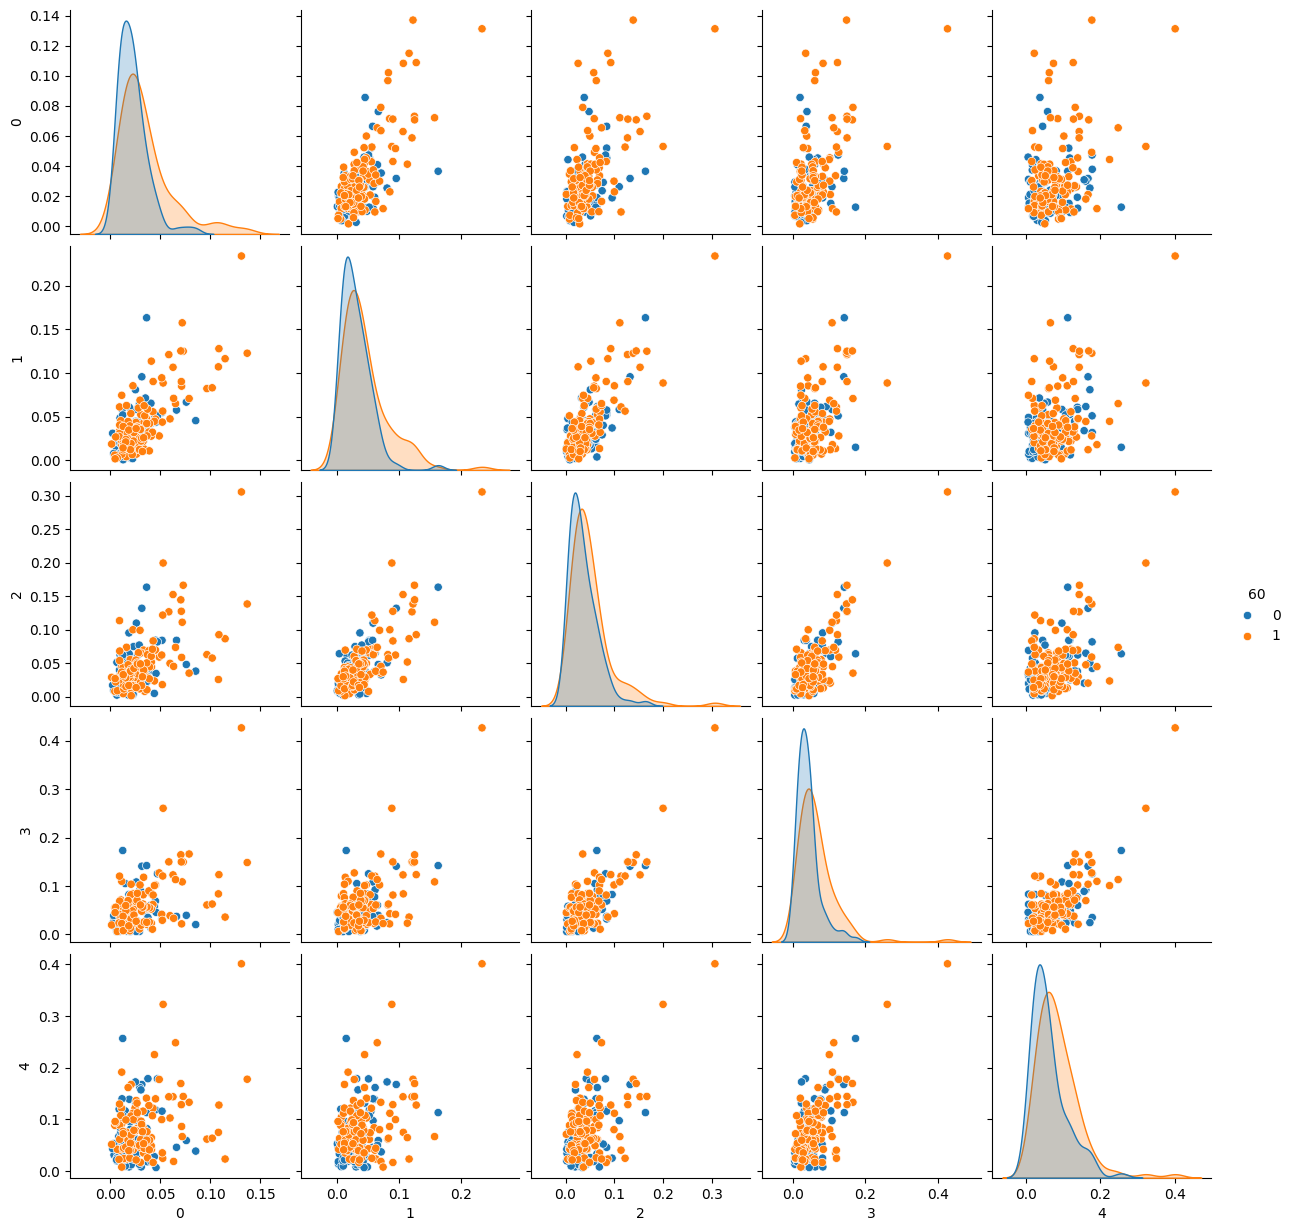

In [13]:
import seaborn as sns

# Select the first 5 columns + '60' for hue
subset_df = df.iloc[:, :5]  # First 5 columns
subset_df[60] = df[60]  # Add the hue column separately

# Create the pairplot
sns.pairplot(subset_df, hue=60)

Based on above diagram we can say which one is best.since there was an overlapping knn is best

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 (default)
knn.fit(train_x,train_y)
knn.predict(test_x)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [33]:
random=RandomForestClassifier(n_estimators=100)
random.fit(train_x,train_y)
random.predict(test_x)

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [34]:
decision=DecisionTreeClassifier()
decision.fit(train_x,train_y)
decision.predict(test_x)

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [45]:
svmm=SVC(gamma=0.6)
svmm.fit(train_x,train_y)
svmm.predict(test_x)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [46]:
reg=LogisticRegression()
reg.fit(train_x,train_y)
b=pd.DataFrame(test_y)
b['logistic']=reg.predict(test_x)
b['random']=reg.predict(test_x)
b['decision']=reg.predict(test_x)
b['svm']=reg.predict(test_x)
b['knn']=reg.predict(test_x)
b.tail(10)

,60,logistic,random,decision,svm,knn
66,0,0,0,0,0,0
120,1,1,1,1,1,1
147,1,1,1,1,1,1
98,1,0,0,0,0,0
138,1,1,1,1,1,1
167,1,0,0,0,0,0
45,0,1,1,1,1,1
113,1,1,1,1,1,1
65,0,0,0,0,0,0
178,1,0,0,0,0,0


In [47]:
print("logistic",reg.score(test_x,test_y))
print("knn",knn.score(test_x,test_y))
print("random",random.score(test_x,test_y))
print("decision",decision.score(test_x,test_y))
print("svm",svmm.score(test_x,test_y))

logistic 0.7857142857142857
knn 0.8571428571428571
random 0.8333333333333334
decision 0.7142857142857143
svm 0.7857142857142857
